In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

In [2]:
def roll_dice(num):
    np.random.seed(0)
    rolls = np.random.randint(1, 7, size=num)
    return rolls

def plot_result(rolls):
    freq = [np.sum(rolls == i) for i in range(1, 7)]
    plt.bar(range(1, 7), freq)
    plt.xlabel("Dice Number")
    plt.ylabel("Frequency")
    plt.title(f"Result of rolling dice {len(rolls):.0f} times")
    plt.xticks(range(1, 7), [1, 2, 3, 4, 5, 6])  # Menambahkan label pada sumbu x
    plt.show()

In [3]:
# rolls =  roll_dice(60) #kocok dadu
# [rolls.count(i) for i in range(1,7)] # hitung probabilitas angka dadu muncul

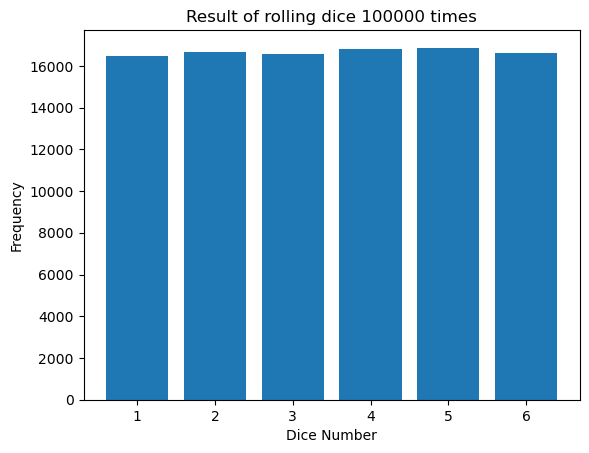

In [4]:
rolls_example = roll_dice(100000)
plot_result(rolls_example)

In [5]:
dadu1 = [1,2,3,4,5,6]
dadu2 = [1,2,3,4,5,6]

len(list(product(dadu1,dadu2)))

36

In [6]:
# Simulasi lemparan dua dadu sebanyak 1000 kali
jumlah_lemparan = 100000
dadu1 = np.random.randint(1, 7, size=jumlah_lemparan)
dadu2 = np.random.randint(1, 7, size=jumlah_lemparan)

# Hitung jumlah total dari dua dadu
total_dadu = dadu1 + dadu2
#print(total_dadu)

# Hitung frekuensi munculnya setiap label (2 hingga 12)
frekuensi_label = np.zeros(11)  # Indeks 0 hingga 10 untuk label 2 hingga 12

for label in range(2, 13):
    frekuensi_label[label - 2] = np.sum(total_dadu == label)
#print(frekuensi_label)

# Hitung probabilitas masing-masing label
probabilitas = frekuensi_label / jumlah_lemparan

# Tampilkan hasil
for label, prob in zip(range(2, 13), probabilitas):
    print(f"Probabilitas jumlah dadu {label}: {prob:.4f}")

Probabilitas jumlah dadu 2: 0.0274
Probabilitas jumlah dadu 3: 0.0553
Probabilitas jumlah dadu 4: 0.0847
Probabilitas jumlah dadu 5: 0.1090
Probabilitas jumlah dadu 6: 0.1379
Probabilitas jumlah dadu 7: 0.1694
Probabilitas jumlah dadu 8: 0.1384
Probabilitas jumlah dadu 9: 0.1090
Probabilitas jumlah dadu 10: 0.0847
Probabilitas jumlah dadu 11: 0.0560
Probabilitas jumlah dadu 12: 0.0283


In [7]:
df = pd.read_csv('../../csv/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
#1 what is the probability of selecting male
total = len(df)
male = df[df["sex"] == 1].shape[0] #ambil jumlah baris
prob = male / total
print(f"Probability of Male: {prob:.4f}")


Probability of Male: 0.6488


In [9]:
#2
non_smoker_male = df[(df["sex"] == 1) & (df["smoking"] == 0)]
count = len(non_smoker_male)
prob_non_smoker_male = count / total
print(f"Probability of Non-Smoker Male: {prob_non_smoker_male:.4f}")


Probability of Non-Smoker Male: 0.3411


In [10]:
#3
source = pd.crosstab(index=df['sex'], columns=df['smoking'], margins=True, margins_name='Total') 
source.index = ['Female', 'Male', 'Total']
source.columns = ['Non Smoker', 'Smoker', 'Total']

source

,Non Smoker,Smoker,Total
Female,101,4,105
Male,102,92,194
Total,203,96,299
